In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [23]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
print(df.shape)

(10000, 14)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
df.duplicated().sum()

0

In [29]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [30]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [31]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [32]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#EDA pending

In [34]:
df =pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [35]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [38]:
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [45]:
X=df.drop(columns=['Exited'])
y =df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [46]:
y_train.shape

(8000,)

In [42]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test)

In [52]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [56]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [98]:
model = Sequential()
model.add(Dense(11, activation ='sigmoid',input_dim=11))
model.add(Dense(11, activation ='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [103]:
history =model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7742 - loss: 0.6027 - val_accuracy: 0.7975 - val_loss: 0.5006
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8038 - loss: 0.4880 - val_accuracy: 0.7975 - val_loss: 0.4859
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4864 - val_accuracy: 0.7975 - val_loss: 0.4739
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4681 - val_accuracy: 0.7975 - val_loss: 0.4612
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4539 - val_accuracy: 0.7975 - val_loss: 0.4496
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7973 - loss: 0.4436 - val_accuracy: 0.8037 - val_loss: 0.4413
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4375 - val_accuracy: 0.8112 - val_loss: 0.4361
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8102 - loss: 0.4236 - val_accu

In [89]:
model.layers[0].get_weights()

[array([[ 1.77041665e-02,  1.73108160e-01,  3.11082959e-01,
          3.39272879e-02, -4.43209022e-01, -6.91032559e-02,
         -2.47791156e-01,  1.35617286e-01, -1.82457209e-01,
         -7.22589120e-02, -5.30134499e-01],
        [-8.82654130e-01,  7.41953701e-02,  6.65647626e-01,
         -6.02766812e-01, -2.82929868e-01,  8.49070251e-01,
          6.55048847e-01,  2.60843545e-01, -5.94782755e-02,
         -2.73280203e-01,  4.05671895e-01],
        [-1.56903073e-01,  2.66621768e-01,  1.52857959e-01,
         -6.34614052e-03, -6.85122252e-01,  1.00041881e-01,
         -2.83791423e-01, -1.18395658e-02, -1.83926731e-01,
          5.90384714e-02,  2.24984288e-01],
        [-5.59931934e-01, -1.11755002e+00, -1.16405815e-01,
         -1.33289471e-01,  2.75384218e-01, -1.52092457e-01,
         -2.77934402e-01, -4.06013906e-01,  1.00196742e-01,
          1.52376428e-01, -6.04642510e-01],
        [-2.17859015e-01, -3.23629737e-01,  7.01106787e-01,
          2.93330867e-02, -2.40511760e-01, -

In [90]:
model.layers[1].get_weights()

[array([[-0.5782286 ,  0.0424617 , -0.7060047 ,  0.35879287, -0.552345  ,
          0.24684939, -0.4087798 , -0.46673834,  0.26059538, -0.678794  ,
          0.22597165],
        [ 0.2940816 ,  0.36167   , -0.273082  ,  0.11886656,  0.22068895,
          0.03382274, -0.2831037 ,  0.31815213,  0.78931516,  0.35939613,
         -0.861249  ],
        [-0.0687158 ,  0.14179103,  0.297071  , -0.03641951,  0.40300205,
          0.7918776 ,  0.32217312, -0.22513993, -0.4648969 ,  0.34759116,
          0.80039597],
        [-0.31843188, -0.00935254, -0.0792292 ,  0.40059817, -1.5428076 ,
          0.23570915, -0.36566472, -0.7405599 , -0.02384473, -0.75611997,
          0.3327712 ],
        [-0.10556651, -0.0189169 , -0.3917115 ,  0.04121648,  0.09907588,
         -0.66893154, -0.80708057, -0.7079566 ,  0.43315914, -0.2179219 ,
          0.11422132],
        [-0.11505967,  0.02925234,  0.36704236, -0.5301099 , -1.0182157 ,
          0.4805745 , -0.1941887 , -0.02452671, -0.04611273, -0.6540603

In [104]:
y_log =model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [105]:
y_pred =np.where(y_log>0.5,1,0)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8595

In [107]:
import matplotlib.pyplot as plt

In [108]:
history.history

{'accuracy': [0.7926562428474426,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7970312237739563,
  0.8043749928474426,
  0.8131250143051147,
  0.8139062523841858,
  0.8143749833106995,
  0.8151562213897705,
  0.81640625,
  0.8182812333106995,
  0.8196874856948853,
  0.8214062452316284,
  0.8228124976158142,
  0.8265625238418579,
  0.827343761920929,
  0.8285937309265137,
  0.8306249976158142,
  0.8329687714576721,
  0.8353124856948853,
  0.8368750214576721,
  0.8373437523841858,
  0.839062511920929,
  0.8409374952316284,
  0.8431249856948853,
  0.8424999713897705,
  0.8424999713897705,
  0.84375,
  0.8421875238418579,
  0.84375,
  0.8442187309265137,
  0.8459374904632568,
  0.8462499976158142,
  0.8464062213897705,
  0.84765625,
  0.8473437428474426,
  0.8490625023841858,
  0.8482812643051147,
  0.8521875143051147,
  0.8496875166893005,
  0.8515625,
  0.8515625,
  0.8512499928474426,
  0.8515625,
  0.8521875143051147,
  0.8532812595367432,

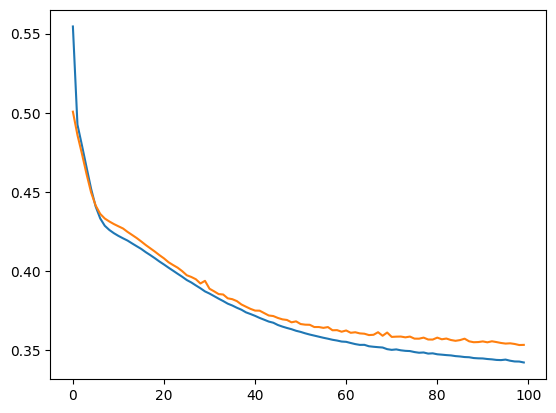

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

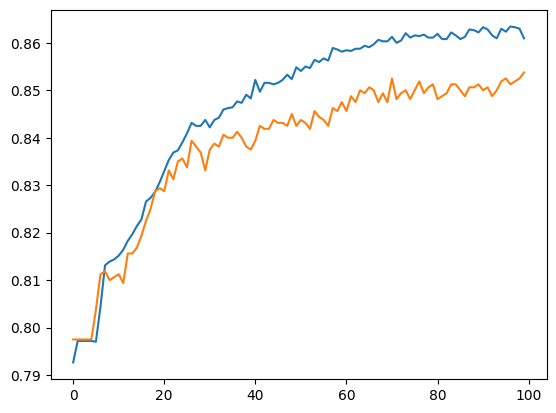

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])